# Goals

# Import Library

In [29]:
# We need to import library that we need
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Kuro
[nltk_data]     Yagi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kuro
[nltk_data]     Yagi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Web Scraping

We will scraping the data

In [21]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        #df = df.append([data_dict], ignore_index=True).reset_index(drop=True)
        df = pd.concat([df, data_dict])
        
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 100 total reviews
Scraping page 3
   ---> 100 total reviews
Scraping page 4
   ---> 200 total reviews
Scraping page 5
   ---> 200 total reviews
Scraping page 6
   ---> 200 total reviews
Scraping page 7
   ---> 200 total reviews
Scraping page 8
   ---> 300 total reviews
Scraping page 9
   ---> 400 total reviews
Scraping page 10
   ---> 400 total reviews


In [22]:
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,Embraer,Business,Economy Class,Frankfurt to London City,August 2023,3.0,3.0,1.0,1.0,1,no,NaN,NaN,✅ Trip Verified | Late boarding led to a one ...
0,NaN,Solo Leisure,Economy Class,London to Lyon,August 2023,NaN,NaN,NaN,1.0,1,no,NaN,NaN,✅ Trip Verified | As usual the flight is delay...
0,Boeing 777,Solo Leisure,Business Class,London to Hong Kong,July 2023,5.0,5.0,5.0,5.0,5,yes,5.0,NaN,✅ Trip Verified | I had the most fantastic BA...
0,NaN,Couple Leisure,Economy Class,Gatwick to Montpelier,July 2023,3.0,3.0,1.0,1.0,1,no,NaN,NaN,✅ Trip Verified | Couldn’t book in online. Ar...
0,Boeing 787-8,Couple Leisure,Business Class,London to Mumbai,July 2023,4.0,5.0,5.0,4.0,4,yes,3.0,NaN,✅ Trip Verified | London Heathrow to Mumbai in...


In [23]:
df.to_csv("data/BA_reviews.csv", index=False)
df = pd.read_csv("data/Ba_reviews.csv")
# Checking data from CSV file
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,Embraer,Business,Economy Class,Frankfurt to London City,August 2023,3.0,3.0,1.0,1.0,1,no,NaN,NaN,✅ Trip Verified | Late boarding led to a one ...
1,NaN,Solo Leisure,Economy Class,London to Lyon,August 2023,NaN,NaN,NaN,1.0,1,no,NaN,NaN,✅ Trip Verified | As usual the flight is delay...
2,Boeing 777,Solo Leisure,Business Class,London to Hong Kong,July 2023,5.0,5.0,5.0,5.0,5,yes,5.0,NaN,✅ Trip Verified | I had the most fantastic BA...
3,NaN,Couple Leisure,Economy Class,Gatwick to Montpelier,July 2023,3.0,3.0,1.0,1.0,1,no,NaN,NaN,✅ Trip Verified | Couldn’t book in online. Ar...
4,Boeing 787-8,Couple Leisure,Business Class,London to Mumbai,July 2023,4.0,5.0,5.0,4.0,4,yes,3.0,NaN,✅ Trip Verified | London Heathrow to Mumbai in...


In [11]:
# Cheking how much columns and rows
df.shape

(1000, 14)

In [12]:
# Cheking info of data
df.info()
# Checking how much missing value per columns
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                551 non-null    object 
 1   Type Of Traveller       999 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   997 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            917 non-null    float64
 6   Cabin Staff Service     911 non-null    float64
 7   Food & Beverages        793 non-null    float64
 8   Ground Service          945 non-null    float64
 9   Value For Money         1000 non-null   int64  
 10  Recommended             1000 non-null   object 
 11  Inflight Entertainment  546 non-null    float64
 12  Wifi & Connectivity     278 non-null    float64
 13  reviews                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

Aircraft                  449
Type Of Traveller           1
Seat Type                   0
Route                       3
Date Flown                  0
Seat Comfort               83
Cabin Staff Service        89
Food & Beverages          207
Ground Service             55
Value For Money             0
Recommended                 0
Inflight Entertainment    454
Wifi & Connectivity       722
reviews                     0
dtype: int64

# Cleaning Data

In [28]:
remove_text = ['✅ Trip Verified |', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

df['reviews'] = df['reviews'].str.replace('  ', ' ')
df['reviews'] = df['reviews'].str.lower()
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,Embraer,Business,Economy Class,Frankfurt to London City,August 2023,3.0,3.0,1.0,1.0,1,no,NaN,NaN,late boarding led to a one hour flight leavi...
1,NaN,Solo Leisure,Economy Class,London to Lyon,August 2023,NaN,NaN,NaN,1.0,1,no,NaN,NaN,as usual the flight is delayed. ba try to bla...
2,Boeing 777,Solo Leisure,Business Class,London to Hong Kong,July 2023,5.0,5.0,5.0,5.0,5,yes,5.0,NaN,i had the most fantastic ba flight today. the...
3,NaN,Couple Leisure,Economy Class,Gatwick to Montpelier,July 2023,3.0,3.0,1.0,1.0,1,no,NaN,NaN,couldn’t book in online. arrived at check in ...
4,Boeing 787-8,Couple Leisure,Business Class,London to Mumbai,July 2023,4.0,5.0,5.0,4.0,4,yes,3.0,NaN,london heathrow to mumbai in a boeing 787-8 i...


# Factor Analysis

In [35]:
df['Recommended'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,372.0,2.712366,1.365954,1.0,1.00,3.0,4.0,5.0
Cabin Staff Service,372.0,3.096774,1.530037,1.0,1.75,3.0,5.0,5.0
Food & Beverages,326.0,2.604294,1.457030,1.0,1.00,2.0,4.0,5.0
Ground Service,385.0,2.522078,1.529282,1.0,1.00,2.0,4.0,5.0
Value For Money,400.0,2.352500,1.445152,1.0,1.00,2.0,4.0,5.0
Inflight Entertainment,227.0,2.770925,1.472593,1.0,1.00,3.0,4.0,5.0
Wifi & Connectivity,119.0,2.067227,1.436398,1.0,1.00,1.0,3.0,5.0


<Axes: xlabel='Recommended', ylabel='count'>

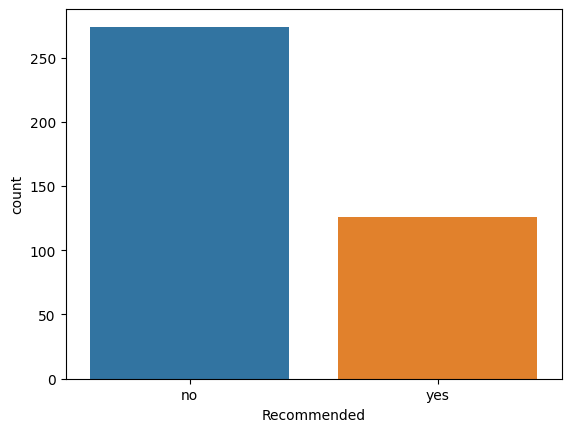

In [37]:
sns.countplot(x='Recommended', data=df)

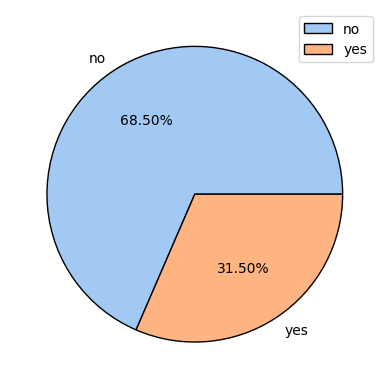

In [39]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct = '%.2f%%', colors = sns.color_palette('pastel'), wedgeprops = {"edgecolor" : "k"})

plt.legend()
plt.show()

<Axes: xlabel='Seat Type', ylabel='count'>

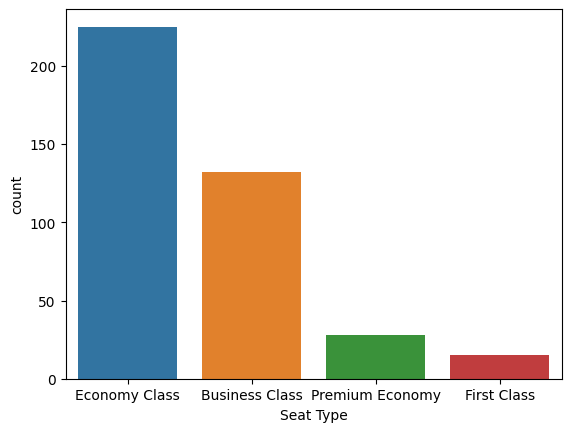

In [41]:
sns.countplot(x="Seat Type", data=df)

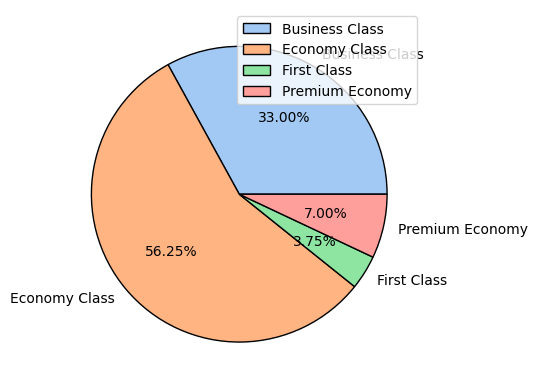

In [47]:
seat_type = df.groupby('Seat Type')['reviews'].count().reset_index()
plt.pie(seat_type['reviews'], labels=seat_type["Seat Type"], autopct = '%.2f%%', colors = sns.color_palette('pastel'), wedgeprops = {"edgecolor" : "k"})

plt.legend()
plt.show()

<Axes: xlabel='Type Of Traveller', ylabel='count'>

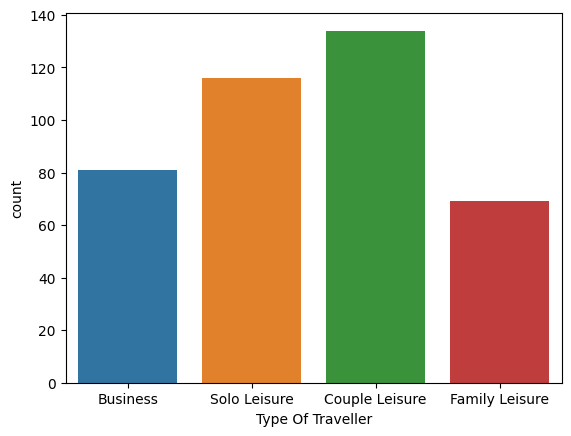

In [48]:
sns.countplot(x='Type Of Traveller', data = df)

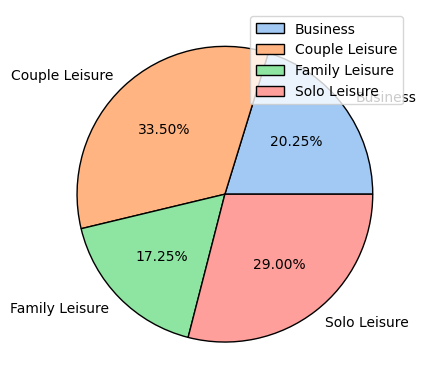

In [50]:
traveller_type = df.groupby('Type Of Traveller')['reviews'].count().reset_index()
plt.pie(traveller_type['reviews'], labels = traveller_type['Type Of Traveller'], autopct = '%.2f%%', colors = sns.color_palette('pastel'), wedgeprops = {"edgecolor" : "k"})

plt.legend()
plt.show()

<Axes: xlabel='Seat Type'>

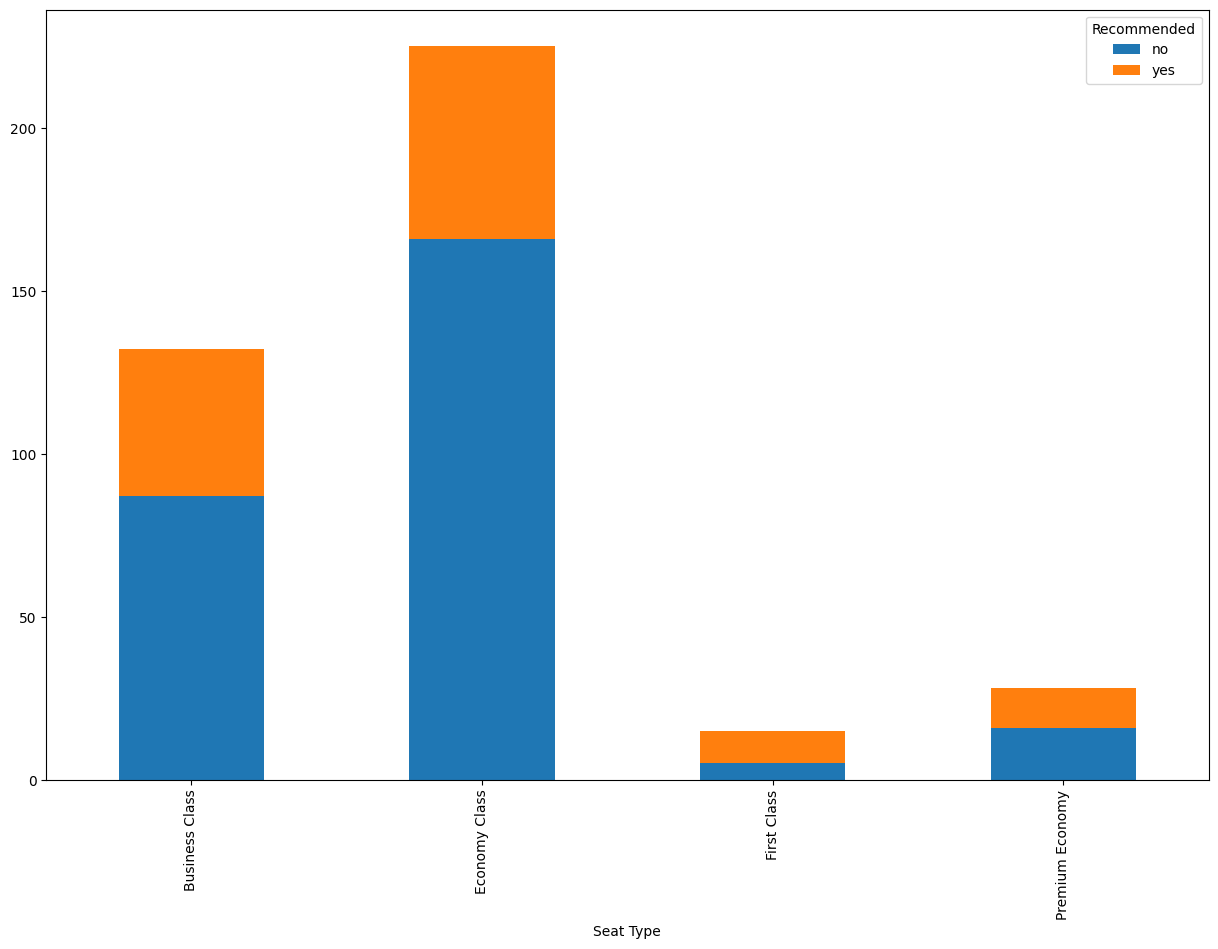

In [52]:
seat_rec = df.groupby(['Seat Type', 'Recommended']).size()
seat_rec.unstack().plot(kind='bar', stacked = True, figsize = (15,10))

<Axes: xlabel='Type Of Traveller'>

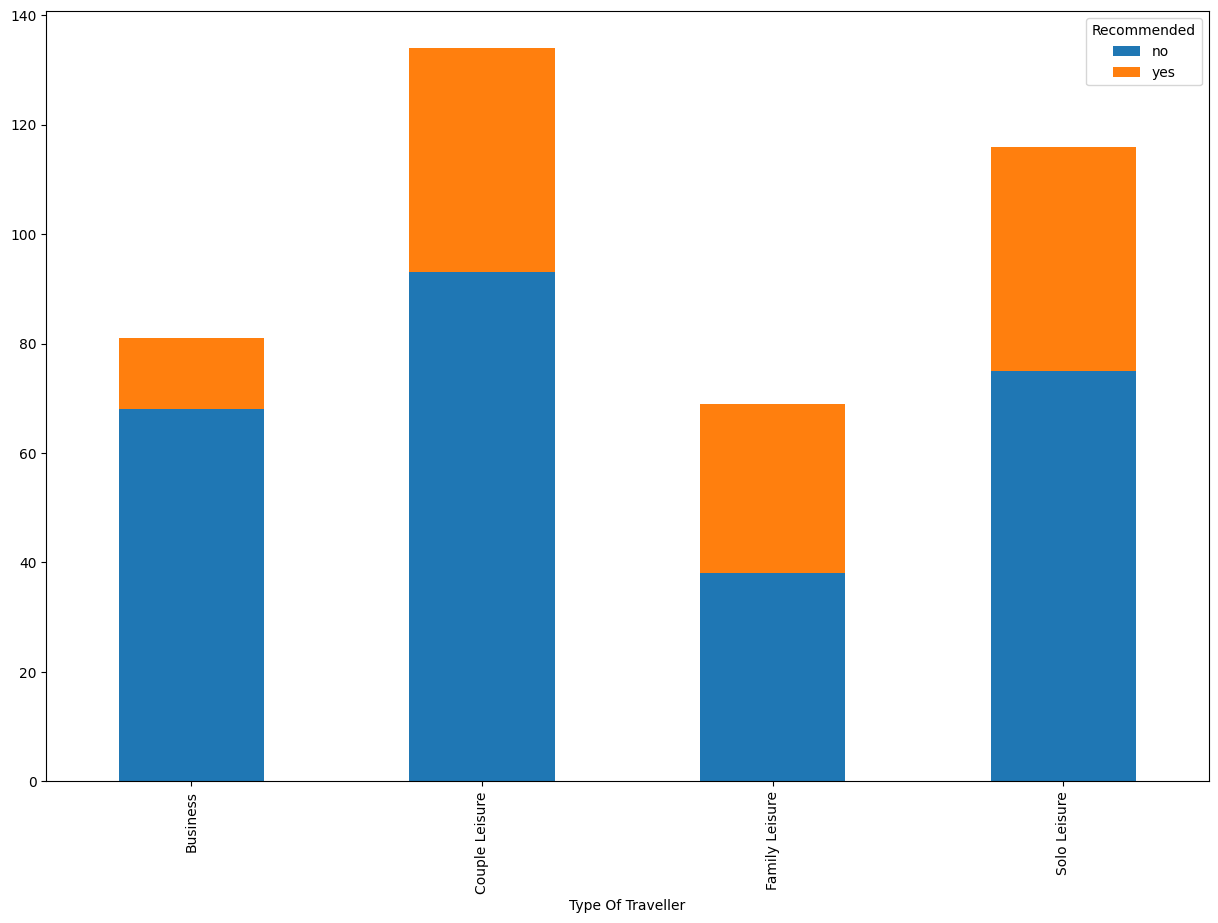

In [53]:
travel_type_rec = df.groupby(['Type Of Traveller', 'Recommended']).size()
travel_type_rec.unstack().plot(kind = 'bar', stacked = True, figsize = (15,10))

Total number of recommendation for each seat type 
  Seat Type
Economy Class      225
Business Class     132
Premium Economy     28
First Class         15
Name: Recommended, dtype: int64


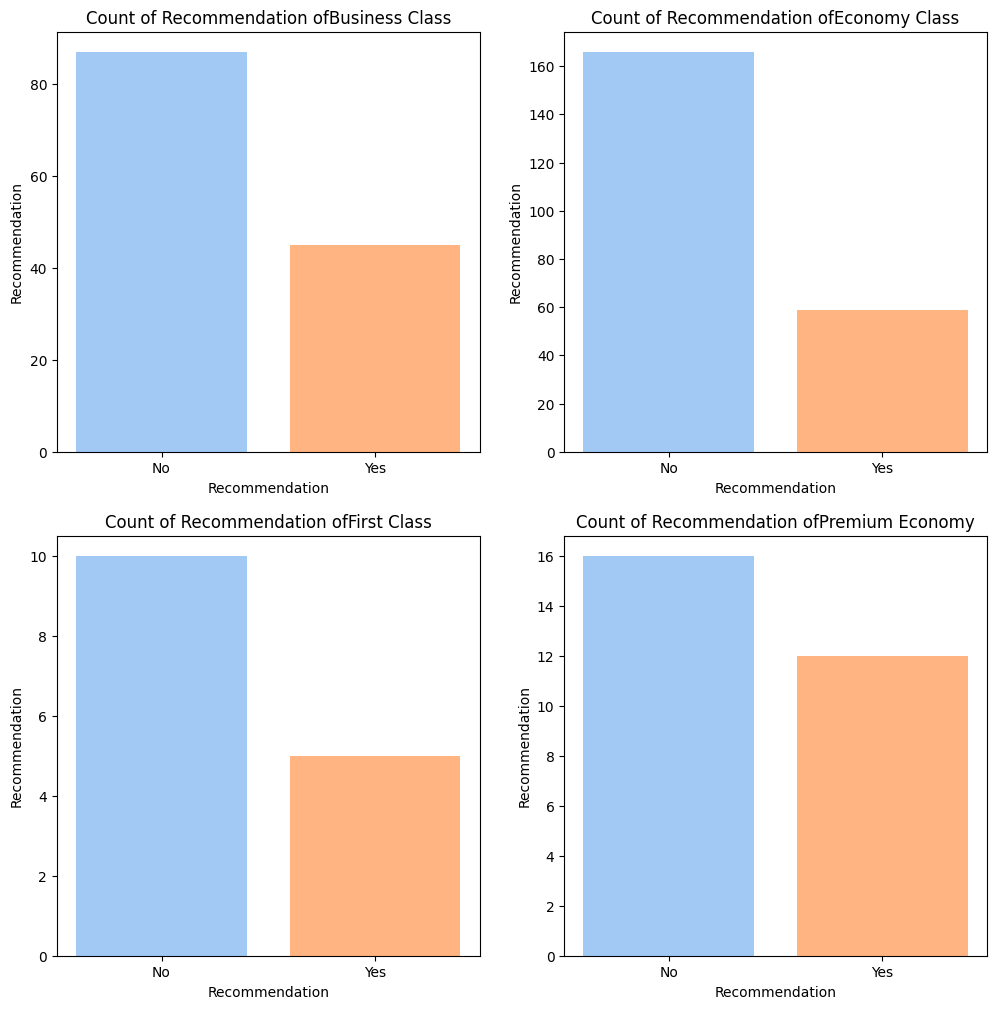

In [66]:
print("Total number of recommendation for each seat type \n ",df.groupby('Seat Type')['Recommended'].count().sort_values(ascending=False))

seat = ['Business Class', 'Economy Class', 'First Class', 'Premium Economy']
plt.figure(1, figsize = (12,12))
for i in seat:
    indices = seat.index(i)
    plt.subplot(2, 2, indices+1)
    new_df = df[df['Seat Type'] == i]
    count = new_df['Recommended'].value_counts()
    Index = [1,2]
    plt.bar(Index, count, color = sns.color_palette('pastel'))
    plt.xticks(Index, ['No', 'Yes'])
    plt.ylabel('Recommendation')
    plt.xlabel('Recommendation')
    plt.title('Count of Recommendation of' + i)

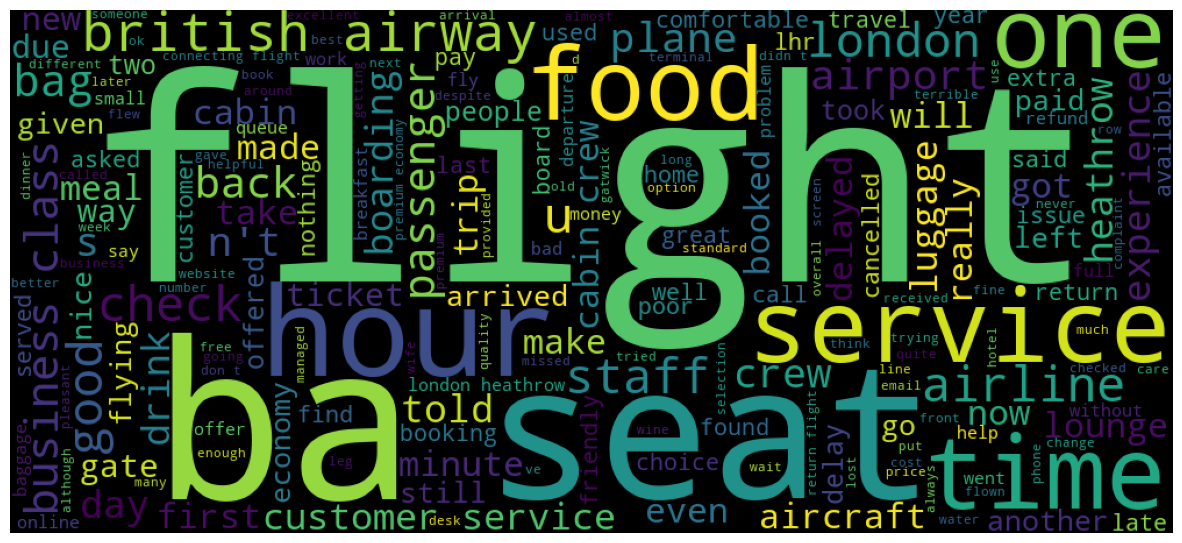

In [65]:
from wordcloud import WordCloud

review_word = []

# Taking review from DataFrame and put in list review_word
review_word = [word for sublist in df['reviews'] for word in sublist]

# Join all word to one list of string
unique_string = " ".join(review_word)

# Making Word Cloud
wc = WordCloud(width=1000, height=450, background_color='black').generate(unique_string)
plt.figure(figsize=(15, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()